In [ ]:
from __future__ import annotations

In [ ]:
from pathlib import Path

from typing import NamedTuple
from typing import Optional

from PIL import Image

import gdown
import numpy as np
import matplotlib.pyplot as plt

## Download the test image

In [ ]:
# download the image we will use as an example

def download_from_gdrive(
    *,
    url: str,
    file_name: str,
    to_dir: Path,
    force: bool = False,
) -> Path:
    file_path = to_dir.joinpath(file_name)

    if force and file_path.exists():
        file_path.unlink()

    if not file_path.exists():
        gdown.download(
            url,
            output=str(file_path),
            quiet=False,
            fuzzy=True,
        )

    return file_path

download_from_gdrive(
    url="https://drive.google.com/file/d/1_Q98Y-uTl4rS_YxuXDLbRP5MQr3lZmhp/view?usp=sharing",
    file_name="000000000025.jpg",
    to_dir=Path("/content"))

Downloading...
From: https://drive.google.com/uc?id=1_Q98Y-uTl4rS_YxuXDLbRP5MQr3lZmhp
To: /content/000000000025.jpg
100%|██████████| 89.7k/89.7k [00:00<00:00, 50.2MB/s]


PosixPath('/content/000000000025.jpg')

In [ ]:
class BoundingBox(NamedTuple):
    x_min: float
    y_min: float
    x_max: float
    y_max: float


## Display utils

In [ ]:
# Helps to display image
# and the bounding boxes on the various objects

def bbox_to_matplotlib_rect(bbox: BoundingBox, color: str):
    """Convert bounding box to matplotlib format."""
    return plt.Rectangle(
        xy=(bbox.x_min, bbox.y_min),
        width=bbox.x_max - bbox.x_min,
        height=bbox.y_max - bbox.y_min,
        fill=False,
        edgecolor=color,
        linewidth=3,
    )

def add_box_to_figure(figure, bbox: BoundingBox, color: str):
    p = figure.axes.add_patch(bbox_to_matplotlib_rect(bbox, color))
    return p

def make_image_figure_with_bboxes(
    image: np.ndarray,
    bounding_boxes: list[BoundingBox],
):

    plt.figure(figsize=(16, 10))

    figure = plt.imshow(image)

    colors = ["blue"] * len(bounding_boxes)

    # add these anchor boxes we have
    for idx, c in enumerate(colors):
        patch = add_box_to_figure(figure, bounding_boxes[idx], c)


    plt.xlim((0, image.shape[1]))
    plt.ylim((image.shape[0], 0))

    plt.show()


## Pascal VOC Format

In [ ]:
# Image and the ground truth bounding boxes

image_path = "/content/000000000025.jpg"

np_image = np.array(Image.open(image_path).convert("RGB"))

# will display only 1 box for now
gt_boxes = [
    BoundingBox(x_min=385, y_min=60, x_max=600, y_max=357),
]

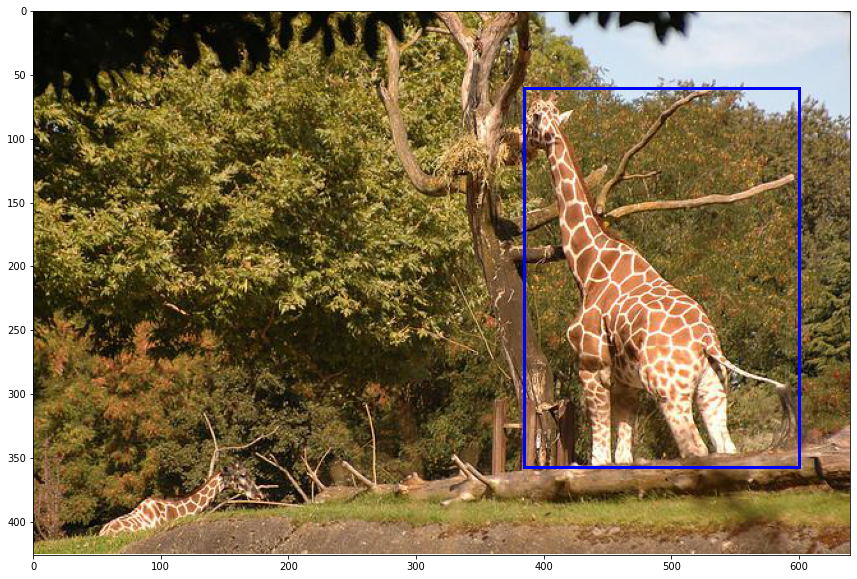

In [ ]:
make_image_figure_with_bboxes(np_image, gt_boxes)

## Coco Format

In [ ]:
gt_boxes = [
    BoundingBox(x_min=385, y_min=60, x_max=600, y_max=357),
]

In [ ]:
class CocoBoundingBox(NamedTuple):
    x_min: float
    y_min: float
    width: float
    height: float

In [ ]:
gt_coco_boxes = [
    CocoBoundingBox(x_min=385, y_min=60, width=215, height=297),
]

In [ ]:
import torch
from torchvision.ops.boxes import box_convert

In [ ]:
box_convert(torch.Tensor(gt_coco_boxes), in_fmt="xywh", out_fmt="xyxy")

tensor([[385.,  60., 600., 357.]])

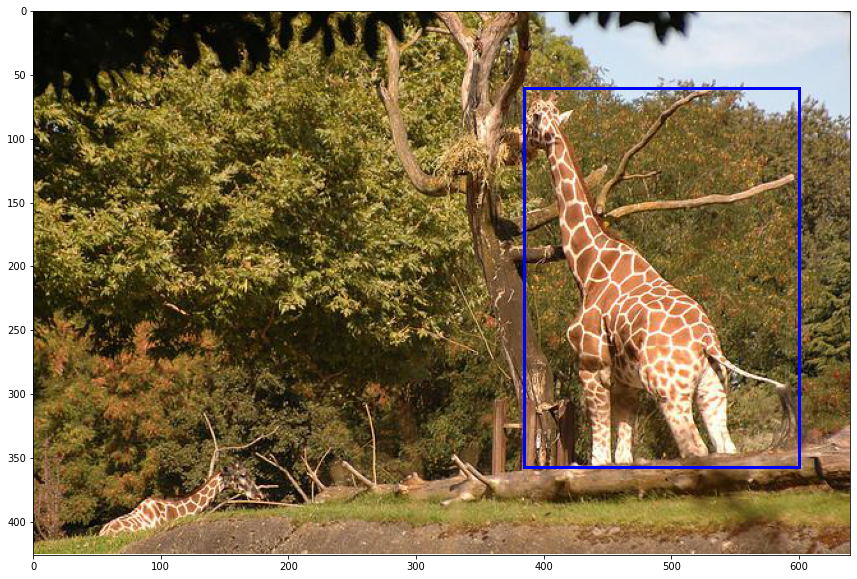

In [ ]:
make_image_figure_with_bboxes(np_image, gt_boxes)

## CxCyWH Format

In [ ]:
gt_boxes = [
    BoundingBox(x_min=385, y_min=60, x_max=600, y_max=357),
]

In [ ]:
class CxCyWHBoundingBox(NamedTuple):
    cx: float
    cy: float
    width: float
    height: float

In [ ]:
gt_cxcy_boxes = [
    CxCyWHBoundingBox(cx=492.5, cy=208.5, width=215, height=297),
]

In [ ]:
box_convert(torch.Tensor(gt_cxcy_boxes), in_fmt="cxcywh", out_fmt="xyxy")

tensor([[385.,  60., 600., 357.]])

## Yolo Format

In [ ]:
image_height, image_width, _ = np_image.shape
image_height, image_width

(426, 640)

In [ ]:
def normalize_cxcywh_box(box: CxCyWHBoundingBox,
                         image_width:int,
                         image_height:int) -> tuple[float, float, float, float]:
  cx = box.cx / image_width
  cy = box.cy / image_height
  width = box.width / image_width
  height = box.height / image_height
  return (cx, cy, width, height)

In [ ]:
normalize_cxcywh_box(gt_cxcy_boxes[0], image_width, image_height)

(0.76953125, 0.4894366197183099, 0.3359375, 0.6971830985915493)